In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
tweet = pd.read_csv("Tweets.csv")
print(tweet.head(3),"\n\n") 
print("The shape of the dataset is", tweet.shape, "\n\n")
print(tweet.isna().any())


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                        0.0  Virgin America   
2            NaN                        NaN  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica

## Observations:

1. There are null values in 'negativereason', 'negativereason_confidence', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_location', 'user_timezone'.
2. Data suggests that 'negativereason' is left blank when sentiment is either positive or neutral.
3. Data also suggests that user's location and timezone is left blank when users do not share their location with the platform.

In [56]:
null = tweet.isnull().sum().sort_values(ascending=False)
total = tweet.shape[0]

percent_null = (tweet.isnull().sum()/total*100).sort_values(ascending=False)
missing_data = pd.concat([null, percent_null], keys=["Total missing", "Percent missing"], axis=1)

print(missing_data)

                              Total missing  Percent missing
negativereason_gold                   14608        99.781421
airline_sentiment_gold                14600        99.726776
tweet_coord                           13621        93.039617
negativereason                         5462        37.308743
user_timezone                          4820        32.923497
tweet_location                         4733        32.329235
negativereason_confidence              4118        28.128415
tweet_created                             0         0.000000
text                                      0         0.000000
retweet_count                             0         0.000000
name                                      0         0.000000
airline                                   0         0.000000
airline_sentiment_confidence              0         0.000000
airline_sentiment                         0         0.000000
tweet_id                                  0         0.000000


In [57]:
duplicaterow = tweet[tweet.duplicated(keep=False)]
duplicaterow.sort_values("tweet_id", inplace=True)
duplicaterow.shape
print("There are", duplicaterow.shape[0], "duplicates in the dataset.")

There are 72 duplicates in the dataset.


In [58]:
duplicaterow.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
12001  570272018840428544           neutral                           1.0   
12162  570272018840428544           neutral                           1.0   
12159  570272880556011520          positive                           1.0   
11998  570272880556011520          positive                           1.0   
11997  570273710210469888          positive                           1.0   

      negativereason  negativereason_confidence   airline  \
12001            NaN                        NaN  American   
12162            NaN                        NaN  American   
12159            NaN                        NaN  American   
11998            NaN                        NaN  American   
11997            NaN                        NaN  American   

      airline_sentiment_gold             name negativereason_gold  \
12001                    NaN  pokecrastinator                 NaN   
12162                    NaN  pokecrastinator                 NaN   
12159                    NaN         ESPartee                 NaN   
11998                    NaN         ESPartee                 NaN   
11997                    NaN           Mtts28                 NaN   

       retweet_count                                               text  \
12001              0  @AmericanAir I thought all those planes were r...   
12162              0  @AmericanAir I thought all those planes were r...   
12159              0  @americanair new plane, #gogo, easy power for ...   
11998              0  @americanair new plane, #gogo, easy power for ...   
11997              0  @AmericanAir These are some awesome photos. Th...   

      tweet_coord              tweet_created  tweet_location  \
12001         NaN  2015-02-24 09:20:19 -0800   United States   
12162         NaN  2015-02-24 09:20:19 -0800   United States   
12159  [0.0, 0.0]  2015-02-24 09:23:44 -0800  alexandria, va   
11998  [0.0, 0.0]  2015-02-24 09:23:44 -0800  alexandria, va   
11997         NaN  2015-02-24 09:27:02 -0800        Virginia   

                     user_timezone  
12001  Mountain Time (US & Canada)  
12162  Mountain Time (US & Canada)  
12159   Eastern Time (US & Canada)  
11998   Eastern Time (US & Canada)  
11997   Eastern Time (US & Canada)

In [59]:
# removing duplicates

tweet.drop_duplicates(keep="first", inplace=True)
duplicaterow = tweet[tweet.duplicated(keep=False)]
duplicaterow.sort_values("tweet_id", inplace=True)
duplicaterow.shape

(0, 15)

In [60]:
tweet.shape

(14604, 15)

In [61]:
print(tweet['airline_sentiment'].unique())
print(tweet['airline_sentiment'].value_counts())

['neutral' 'positive' 'negative']
negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64


In [62]:
pos_tweet = tweet[tweet['airline_sentiment'] == "positive"]
neg_tweet = tweet[tweet['airline_sentiment'] == "negative"]
neu_tweet = tweet[tweet['airline_sentiment'] == "neutral"]

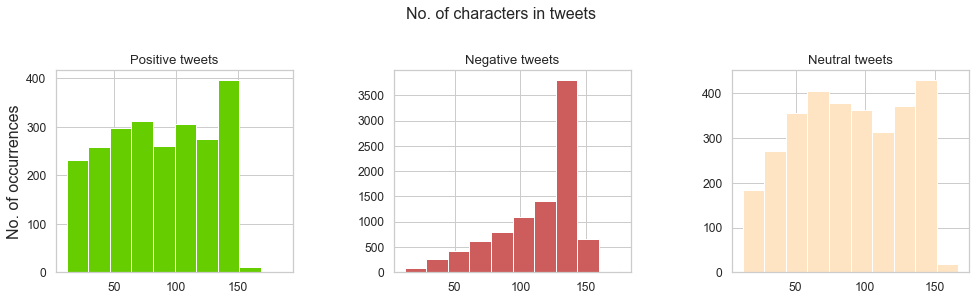

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.tight_layout(pad=5.0)

pos_len = pos_tweet['text'].str.len()
ax1.hist(pos_len, color='#66CD00')
ax1.set_title("Positive tweets")

neg_len = neg_tweet['text'].str.len()
ax2.hist(neg_len, color='indianred')
ax2.set_title("Negative tweets")

neu_len = neu_tweet['text'].str.len()
ax3.hist(neu_len, color='#FFE4C4')
ax3.set_title("Neutral tweets")

fig.suptitle("No. of characters in tweets \n", fontsize=16)
ax1.set_ylabel('No. of occurrences', fontsize=16)
plt.show()

In [64]:
tweet['airline_sentiment'].value_counts(normalize=True)

negative    0.627157
neutral     0.211654
positive    0.161189
Name: airline_sentiment, dtype: float64

In [65]:
class_tweet = tweet.groupby('airline_sentiment').count()['text'].reset_index().sort_values(by='text', ascending=False)

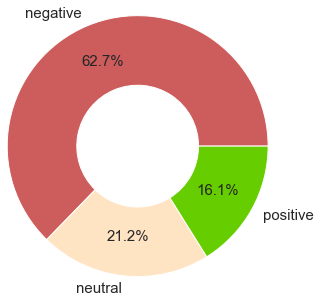

In [66]:
percent_class = class_tweet['text']
labels = class_tweet['airline_sentiment']

colors = ['indianred', '#FFE4C4', '#66CD00']

my_pie,_,_ = plt.pie(percent_class, radius =1.5, labels=labels, labeldistance=1.1, colors=colors,
                     pctdistance=0.7, textprops = {'fontsize': 15}, autopct='%.1f%%')

plt.setp(my_pie, width=0.8, edgecolor='white')

plt.show()

In [67]:
# create pie chart for how many tweets per airline

def createPieChartFor(tweet):
    Lst = 100*tweet.value_counts()/len(tweet)
    
    # set data for pie chart
    
    labels = tweet.value_counts().index.values
    size = Lst
    colors = ['indianred', '#FFE4C4', '#66CD00']
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(size, labels=labels, autopct='%1.2f%%', colors=colors, shadow=True, startangle=90)
    ax1.axis('equal') # aspect ratio ensures that pie is drawn as circle
    
    plt.show()

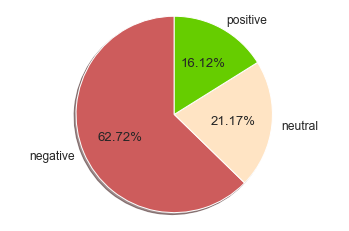

In [68]:
createPieChartFor(tweet.airline_sentiment)

### Observations:

1. Majority of the tweets (62.7%) are of negative sentiment.
2. There are more negative sentiments (62.7%) than positive and neutral combined (37.3%). 
3. Data suggests that customers tend to leave negative feedback than positive feedback.

# <b> New dataframe with selected features</b>

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
tweets = tweet[['tweet_id', 'negativereason', 'airline','text','tweet_coord', 'airline_sentiment', 'tweet_created']]
tweets['text_len'] = [len(char) for char in tweet.text]

tweets.head()

tweet_id negativereason         airline  \
0  570306133677760513            NaN  Virgin America   
1  570301130888122368            NaN  Virgin America   
2  570301083672813571            NaN  Virgin America   
3  570301031407624196     Bad Flight  Virgin America   
4  570300817074462722     Can't Tell  Virgin America   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

  airline_sentiment              tweet_created  text_len  
0           neutral  2015-02-24 11:35:52 -0800        35  
1          positive  2015-02-24 11:15:59 -0800        72  
2           neutral  2015-02-24 11:15:48 -0800        71  
3          negative  2015-02-24 11:15:36 -0800       126  
4          negative  2015-02-24 11:14:45 -0800        55

In [71]:
# are there any records where sentiment is negative and no reason was given?

tweets[tweets['airline_sentiment'] =="negative"].loc[tweets["negativereason"].isnull()].shape

# no records found

(0, 8)

In [72]:
# are there any records where sentiment is positive or neutral and a reason was given?

tweets[tweets['airline_sentiment'] != 'negative'].loc[tweets['negativereason'].notnull()].shape

# no records found

(0, 8)

Text(0.5, 1.0, 'Number of tweets for each airline')

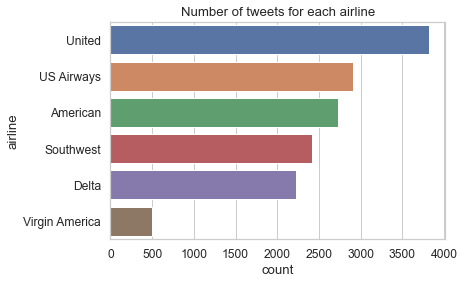

In [73]:
import seaborn as sns

# find how many tweets for each airline

sns.countplot(data=tweets, y=tweets['airline'], order=tweets['airline'].value_counts().index).set_title("Number of tweets for each airline")

### Observations:
1. United Airlines garnered the most number of tweets.
2. Virgin America garnered the least number of tweets.
3. US Airways, American Airlines, Southwest Airlines and Delta have a relevant similar number of tweets.

Text(0.5, 1.0, 'Number of tweets per airline')

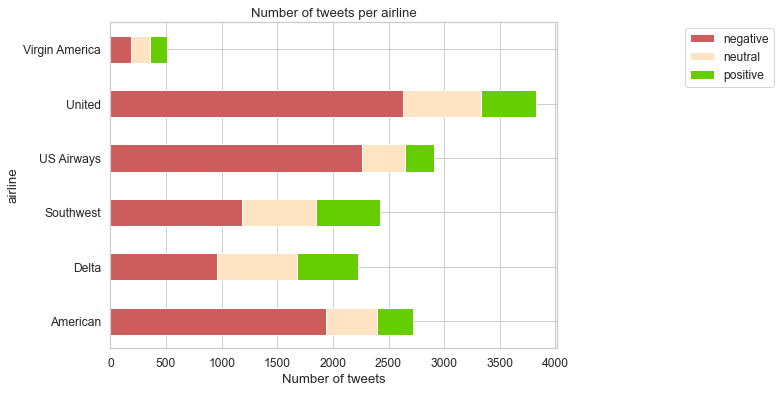

In [74]:
types = tweets.groupby("airline")['airline_sentiment'].value_counts(normalize=False).sort_index()
types.unstack().plot(kind='barh', stacked='True', figsize=(8,6), color=colors)
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel("Number of tweets")
plt.title("Number of tweets per airline")

### Observations:

1. United and American Airlines have a more disproportionate amount of negative tweets than positive and neutral tweets combined
2. Virgin America has about the same proportion of positive, neutral and negative tweets.

<AxesSubplot:>

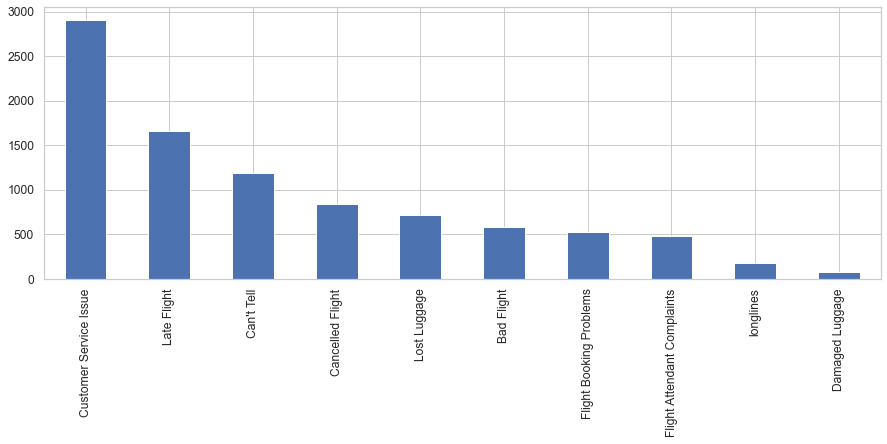

In [75]:
tweets.negativereason.value_counts().plot(kind='bar', figsize=(15,5))

### Observation:
It seems that Customer Service is the main reason for complaints, followed by flight delays.


Text(0.5, 1.0, 'Distribution of types of negative tweets per airline')

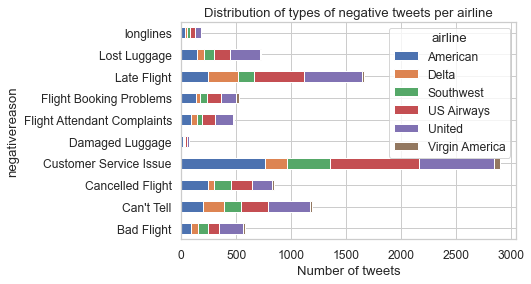

In [76]:
types1 = tweets.groupby("negativereason")['airline'].value_counts(normalize=False).sort_index()
types1.unstack().plot(kind='barh', stacked='True')
plt.xlabel("Number of tweets")
plt.title("Distribution of types of negative tweets per airline")

### Observations:
1. Most customers have poor experiences due to Customer Service Issue compared to any other reasons.
2. Complaints about damaged luggage are the least.
3. There are a considerable number of people who "can't tell" their reasons for their negative tweets. Reasons could be due to: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - a proportion of "internet trolls" with no basis for complaints

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - customers preferring to keep their reasons confidential 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- customers who did not include their reasons for complaints

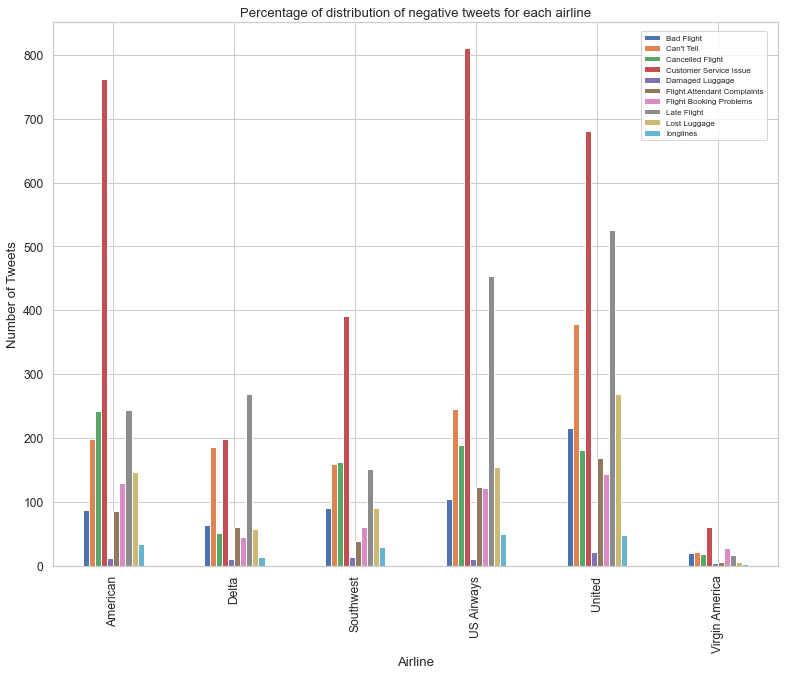

In [77]:
types2 = tweets.groupby('airline')['negativereason'].value_counts(normalize=False).unstack()
types2.plot(kind='bar', figsize=(13,10))
plt.legend(bbox_to_anchor=(0.99,0.99), loc='upper right', prop={'size': 8})
plt.ylabel("Number of Tweets")
plt.xlabel("Airline")
plt.title('Percentage of distribution of negative tweets for each airline')
plt.show()

Text(0, 0.5, 'Percentage %')

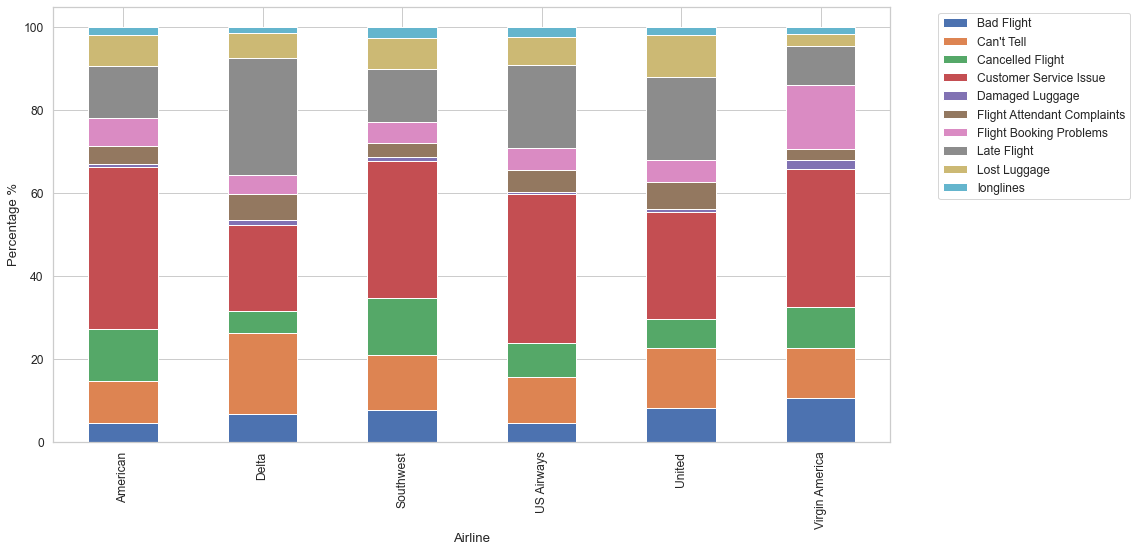

In [78]:
types3 = tweets.groupby('airline')['negativereason'].value_counts(normalize=True).unstack()
stacked_pct = types3.apply(lambda x: x*100/sum(x), axis=1)
stacked_pct.plot(kind="bar", stacked=True, figsize=(15, 8))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Airline")
plt.ylabel("Percentage %")


### Observations:
1. Percentage wise, Delta Airlines and United Airlines has the largest percentage of flight delays.
2. Among each airline's complaints, lost baggage is one of the main issues for Southwest Airlines and United Airlines.
3. Customer service also tends to be better for Delta and United Airlines.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bad Flight'),
  Text(1, 0, "Can't Tell"),
  Text(2, 0, 'Late Flight'),
  Text(3, 0, 'Customer Service Issue'),
  Text(4, 0, 'Flight Booking Problems'),
  Text(5, 0, 'Lost Luggage'),
  Text(6, 0, 'Flight Attendant Complaints'),
  Text(7, 0, 'Cancelled Flight'),
  Text(8, 0, 'Damaged Luggage'),
  Text(9, 0, 'longlines')])

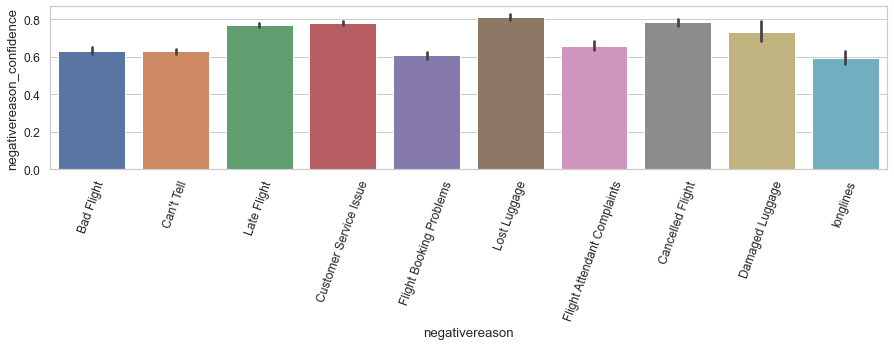

In [79]:
plt.figure(figsize=(15,3))
sns.set(font_scale= 1.1)
sns.set_style("whitegrid")
ax = sns.barplot(x="negativereason", y="negativereason_confidence", data=tweet)
plt.xticks(rotation=70)

In [80]:
!pip install folium

In [81]:
import folium
import re
myCord=tweets['tweet_coord'].dropna().tolist()
Num=re.findall(r"[-+]?\d*\.\d+|\d+", myCord[0])
map1 = folium.Map(location=[Num[0],Num[1]], zoom_start=2)
for i in range(1, len(myCord)):
    Num=re.findall(r"[-+]?\d*\.\d+|\d+", myCord[i])
    folium.Marker([Num[0],Num[1]], icon=folium.Icon(color='red', icon='glyphicon glyphicon-user',size=2)).add_to(map1)
map1

In [82]:
tweets = tweets.drop(['tweet_coord'], axis=1)
tweets.head()

tweet_id negativereason         airline  \
0  570306133677760513            NaN  Virgin America   
1  570301130888122368            NaN  Virgin America   
2  570301083672813571            NaN  Virgin America   
3  570301031407624196     Bad Flight  Virgin America   
4  570300817074462722     Can't Tell  Virgin America   

                                                text airline_sentiment  \
0                @VirginAmerica What @dhepburn said.           neutral   
1  @VirginAmerica plus you've added commercials t...          positive   
2  @VirginAmerica I didn't today... Must mean I n...           neutral   
3  @VirginAmerica it's really aggressive to blast...          negative   
4  @VirginAmerica and it's a really big bad thing...          negative   

               tweet_created  text_len  
0  2015-02-24 11:35:52 -0800        35  
1  2015-02-24 11:15:59 -0800        72  
2  2015-02-24 11:15:48 -0800        71  
3  2015-02-24 11:15:36 -0800       126  
4  2015-02-24 11:14:45 -0800        55

In [83]:
# remove mentions
tweets['text']=tweets['text'].str.replace('@VirginAmerica','')
tweets['text']=tweets['text'].str.replace('@united','')
tweets['text']=tweets['text'].str.replace('@SouthwestAir','')
tweets['text']=tweets['text'].str.replace('@JetBlue','')
tweets['text']=tweets['text'].str.replace('@AmericanAir','')
tweets['text']=tweets['text'].str.replace('@USAirways','')
tweets.head()

tweet_id negativereason         airline  \
0  570306133677760513            NaN  Virgin America   
1  570301130888122368            NaN  Virgin America   
2  570301083672813571            NaN  Virgin America   
3  570301031407624196     Bad Flight  Virgin America   
4  570300817074462722     Can't Tell  Virgin America   

                                                text airline_sentiment  \
0                               What @dhepburn said.           neutral   
1   plus you've added commercials to the experien...          positive   
2   I didn't today... Must mean I need to take an...           neutral   
3   it's really aggressive to blast obnoxious "en...          negative   
4           and it's a really big bad thing about it          negative   

               tweet_created  text_len  
0  2015-02-24 11:35:52 -0800        35  
1  2015-02-24 11:15:59 -0800        72  
2  2015-02-24 11:15:48 -0800        71  
3  2015-02-24 11:15:36 -0800       126  
4  2015-02-24 11:14:45 -0800        55

In [84]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [85]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [86]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    
    # tqdm is for printing the status bar
    for sentence in tqdm(text_data):
        sent = decontracted(sentence)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('http"', ' ')          # added later
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
        
    return preprocessed_text

In [87]:
# create a new column for clean text

tweets['text_clean'] = preprocess_text(tweets['text'].values)
tweets.head()

100%|██████████| 14604/14604 [00:00<00:00, 18448.47it/s]


tweet_id negativereason         airline  \
0  570306133677760513            NaN  Virgin America   
1  570301130888122368            NaN  Virgin America   
2  570301083672813571            NaN  Virgin America   
3  570301031407624196     Bad Flight  Virgin America   
4  570300817074462722     Can't Tell  Virgin America   

                                                text airline_sentiment  \
0                               What @dhepburn said.           neutral   
1   plus you've added commercials to the experien...          positive   
2   I didn't today... Must mean I need to take an...           neutral   
3   it's really aggressive to blast obnoxious "en...          negative   
4           and it's a really big bad thing about it          negative   

               tweet_created  text_len  \
0  2015-02-24 11:35:52 -0800        35   
1  2015-02-24 11:15:59 -0800        72   
2  2015-02-24 11:15:48 -0800        71   
3  2015-02-24 11:15:36 -0800       126   
4  2015-02-24 11:14:45 -0800        55   

                                          text_clean  
0                                      dhepburn said  
1            plus added commercials experience tacky  
2         not today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing

In [88]:
# drop 'text' column
tweets=tweets.drop(['text'],axis=1)
tweets.head()

tweet_id negativereason         airline airline_sentiment  \
0  570306133677760513            NaN  Virgin America           neutral   
1  570301130888122368            NaN  Virgin America          positive   
2  570301083672813571            NaN  Virgin America           neutral   
3  570301031407624196     Bad Flight  Virgin America          negative   
4  570300817074462722     Can't Tell  Virgin America          negative   

               tweet_created  text_len  \
0  2015-02-24 11:35:52 -0800        35   
1  2015-02-24 11:15:59 -0800        72   
2  2015-02-24 11:15:48 -0800        71   
3  2015-02-24 11:15:36 -0800       126   
4  2015-02-24 11:14:45 -0800        55   

                                          text_clean  
0                                      dhepburn said  
1            plus added commercials experience tacky  
2         not today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing

In [89]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14604 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           14604 non-null  int64 
 1   negativereason     9159 non-null   object
 2   airline            14604 non-null  object
 3   airline_sentiment  14604 non-null  object
 4   tweet_created      14604 non-null  object
 5   text_len           14604 non-null  int64 
 6   text_clean         14604 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


In [90]:
# Merge neutral and positive sentiments in one category
# neutral convert to positive
tweets['airline_sentiment']=tweets['airline_sentiment'].str.replace('neutral','positive')

In [91]:
tweets.to_csv("preprocessed_tweets.csv")
df = pd.read_csv("preprocessed_tweets.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

tweet_id negativereason         airline airline_sentiment  \
0  570306133677760513            NaN  Virgin America          positive   
1  570301130888122368            NaN  Virgin America          positive   
2  570301083672813571            NaN  Virgin America          positive   
3  570301031407624196     Bad Flight  Virgin America          negative   
4  570300817074462722     Can't Tell  Virgin America          negative   

               tweet_created  text_len  \
0  2015-02-24 11:35:52 -0800        35   
1  2015-02-24 11:15:59 -0800        72   
2  2015-02-24 11:15:48 -0800        71   
3  2015-02-24 11:15:36 -0800       126   
4  2015-02-24 11:14:45 -0800        55   

                                          text_clean  
0                                      dhepburn said  
1            plus added commercials experience tacky  
2         not today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing

In [92]:
txt = ' '.join(str(text) for text in df['text_clean'])
txt = txt.split()
freq_count = pd.Series(txt).value_counts()
type(freq_count)

pandas.core.series.Series

In [93]:
freq_df = freq_count.to_frame()

In [94]:
freq_df.tail()

0
offended        1
volt            1
ua6             1
bool            1
stellarservice  1

In [95]:
freq=df['text_clean'].str.split(expand=True).stack().value_counts().to_frame()
freq.rename(columns = {0:'count'}, inplace = True) 
   
freq.head()

count
flight   3930
not      3654
no       1502
get      1340
co       1211

### Observations:
1. "Flight" is the most frequently used word in tweets.
2. "Flight" and "not" are the most common words appearing more than 3000 times.

In [96]:
print("Total number of words in Corpus are:", freq['count'].sum())

Total number of words in Corpus are: 144190


In [97]:
print("Words that appeared > 3000 times: ", freq.loc[freq['count']>3000].shape[0])
print("Words that appeared 2500< < 3000 times: ", freq.loc[freq['count']<=3000].loc[freq['count']>2500].shape[0])
print("Total number of words that has appeared 3 times in Corpus are: ",freq.loc[freq['count']==3].shape[0])
print("Total number of words that has appeared 2 times in Corpus are: ",freq.loc[freq['count']==2].shape[0])
print("Total number of words that has appeared 1 times in Corpus are: ",freq.loc[freq['count']==1].shape[0])

Words that appeared > 3000 times:  2
Words that appeared 2500< < 3000 times:  0
Total number of words that has appeared 3 times in Corpus are:  894
Total number of words that has appeared 2 times in Corpus are:  1910
Total number of words that has appeared 1 times in Corpus are:  8591


### Observations:

1. Only 8591 words have appeared once. This is not good for modelling.

Text(0.5, 1.0, 'Number of words with there frequency of appearance')

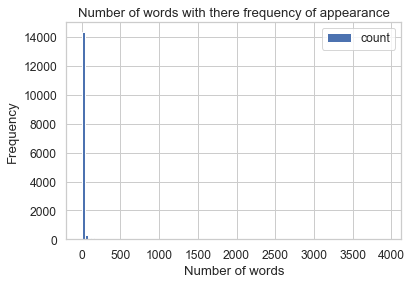

In [98]:
freq.plot.hist(bins=100)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency of appearance")

### Observations:
1. This is a imbalanced distribution.
2. There is a large number of words that appear only very few times.

Text(0.5, 1.0, 'Number of words with there frequency less than 100')

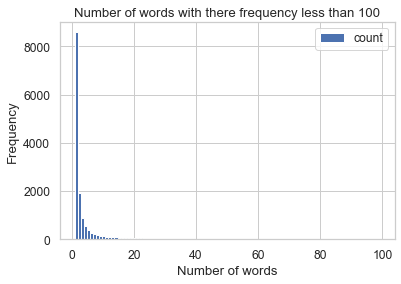

In [99]:
# locate freq count less than 100 times and plot a histogram
freq.loc[freq['count']<100].plot.hist(bins=100)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 100")

Text(0.5, 1.0, 'Number of words with there frequency less than 50')

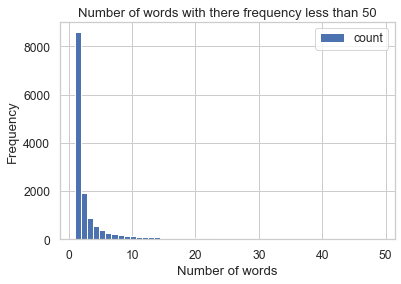

In [100]:
# locate freq count less than 50 times and plot a histogram
freq.loc[freq['count']<50].plot.hist(bins=50)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 50")

Text(0.5, 1.0, 'Number of words with there frequency less than 20')

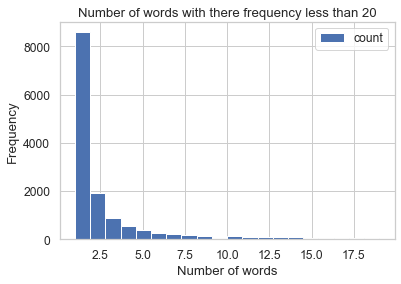

In [101]:
freq.loc[freq['count']<20].plot.hist(bins=20)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 20")

Text(0.5, 1.0, 'Number of words with there frequency less than 10')

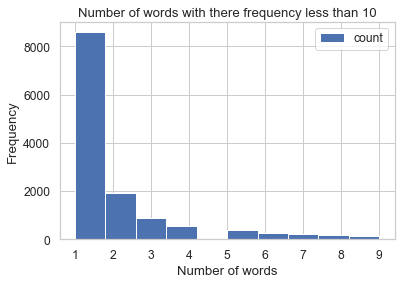

In [102]:
freq.loc[freq['count']<10].plot.hist(bins=10)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 10")

In [103]:
# look at the words that only occur once
freq.tail(50)

count
loudspeaker                      1
discnct                          1
whyjeff                          1
kmdw                             1
roo                              1
availab                          1
bz                               1
fd2tnyctrb                       1
las2sfo                          1
godelta                          1
pw1eudlczg                       1
salisbury                        1
rozana                           1
swindle                          1
ialiceh2ft                       1
x6syw3mdvu                       1
leastthebeverageswillbecold      1
whitterbug                       1
0cevy3p42b                       1
janna                            1
ua381                            1
cstsvc                           1
5722                             1
sagerooski                       1
3415                             1
hid                              1
vigil                            1
wannaa                           1
630a                             1
teenager                         1
gifting                          1
olympic                          1
15am                             1
noooooooooooooooooooooope        1
nonworking                       1
hotlanta                         1
flt803                           1
irons                            1
25a                              1
1838                             1
propositioned                    1
mitchsunderland                  1
ridic                            1
domingo                          1
offended                         1
volt                             1
ua6                              1
bool                             1
dreading                         1
stellarservice                   1

### Observations:
1. Many misspelled words like "rajuchinthala", "l2n0eghdgn" and "thansk", they could be Twitter handles or just simply incorrect spelling.
2. Shortforms like "chking" means "checking". It is a common word but we don't have a way to stem it.

In [104]:
text = " ".join(str(review) for review in df['text_clean'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 923492 words in the combination of all review.


## Wordcloud for entire corpus

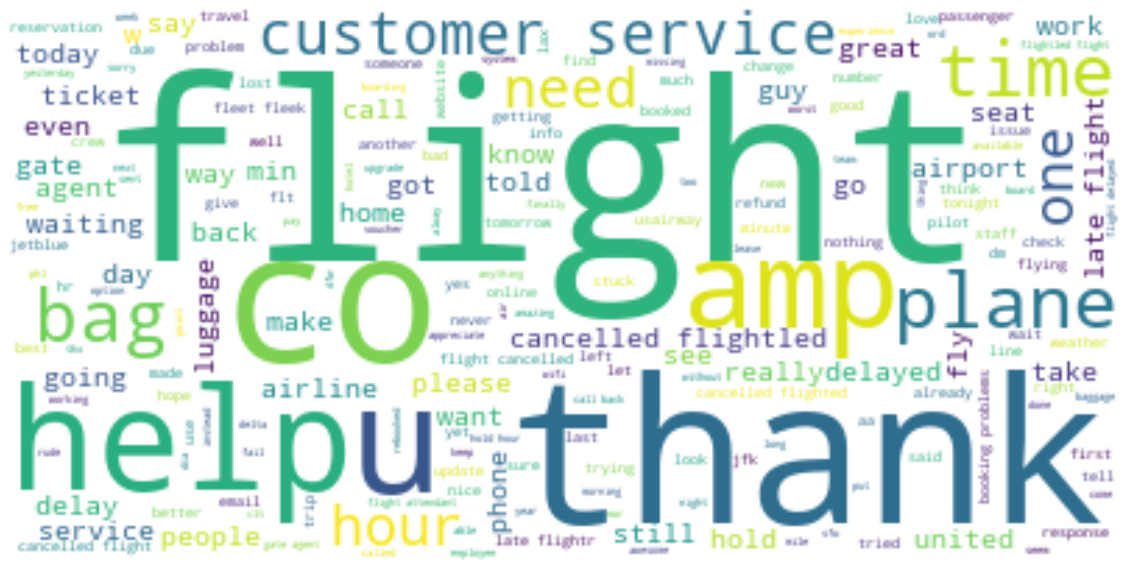

In [105]:
from wordcloud import WordCloud 
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud for negative sentiment

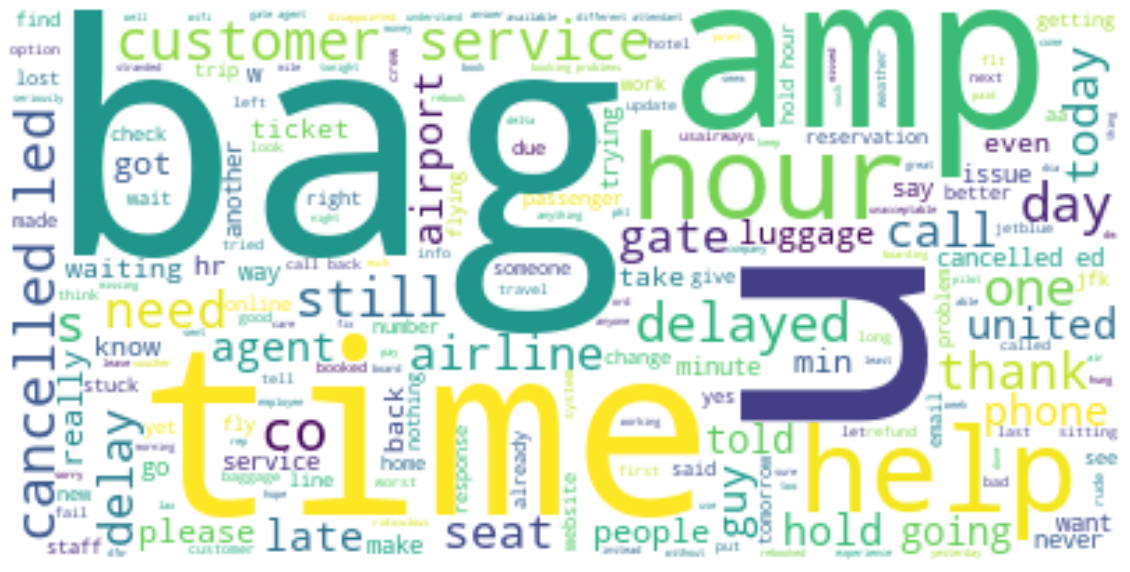

In [107]:
# plot negative wordcloud but remove common stopwords like "flight" and "plane"

textNeg = " ".join(str(review) for review in df['text_clean'].loc[df['airline_sentiment']=='negative'])
textNeg=textNeg.replace('flight', '')
textNeg=textNeg.replace('plane', '')
wordcloud = WordCloud(background_color="white").generate(textNeg)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Observations:
1. "Bag" is the most common word in tweets with negative sentiment. It appears that many customers had issues with lost baggage.
2. Another word that also appears commonly is "time". This could be a result of flight delays or any type of delays, for that matter.
3. People also tend to <a href="https://slangit.com/meaning/amp">"amp"</a> when they are venting their frustration.
4. In conclusion: Most customers seemed to be complaining about customer service, flight delays and lost baggage.

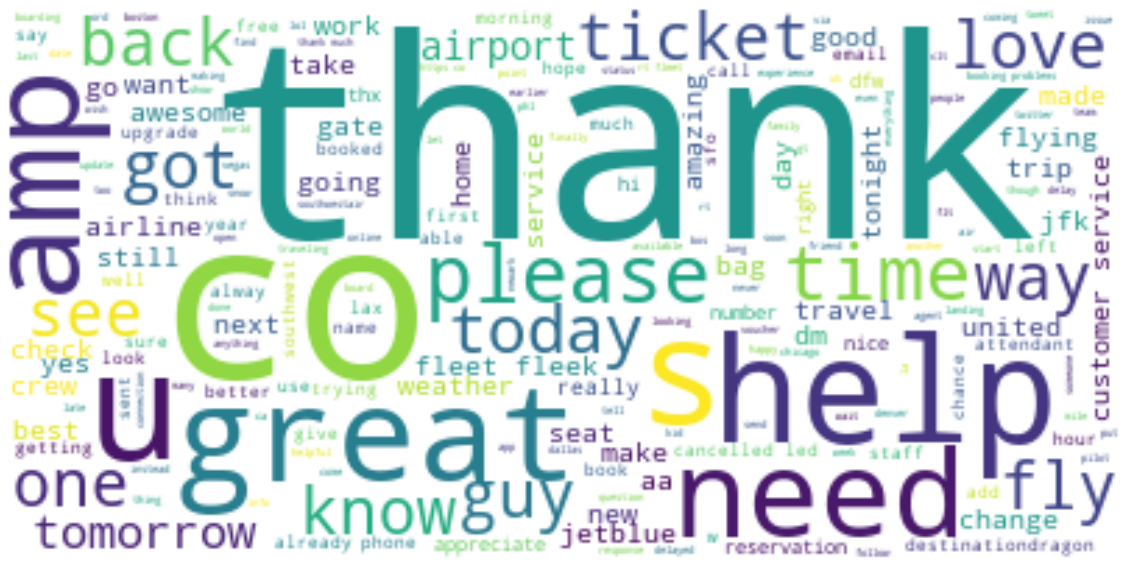

In [108]:
# positive cloud

textPos = " ".join(str(review) for review in df['text_clean'].loc[df['airline_sentiment']=='positive'])
textPos = textPos.replace("flight", "")
textPos = textPos.replace("plane", "")
wordcloud = WordCloud(background_color='white').generate(textPos)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Observations:
1. People tend to write positive tweets (as shown by "thank", "great") when they are satisfied or have positive sentiments about the airline. 

In [109]:
### alternatively, you can create a function to generate a wordcloud

from wordcloud import WordCloud, STOPWORDS

def createWordCloud(sentiment):
    temp_df = tweet[tweet.airline_sentiment == sentiment]
    words = " ".join(temp_df.text)
    
    cleaned_words = " ".join([w for w in words.split() if 
                              "http" not in w 
                              and not w.startswith("@") 
                              and w != "RT"])
    wrdcld = WordCloud(stopwords=STOPWORDS, background_color='white',
                      width=1500, height=1000).generate(cleaned_words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis("off")
    plt.show()

    

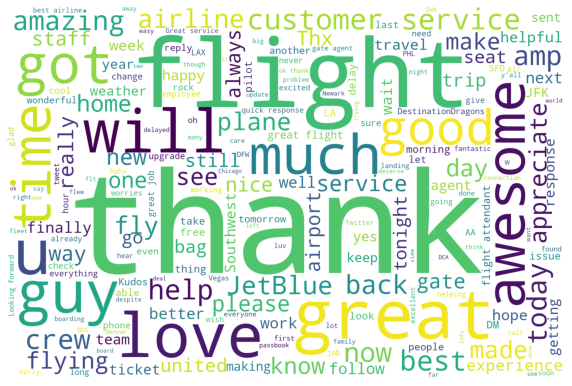

In [110]:
createWordCloud('positive')

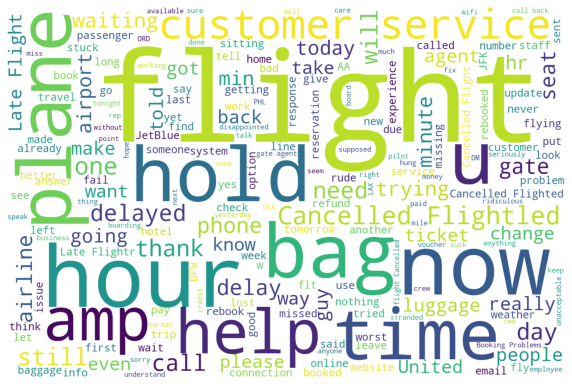

In [112]:
createWordCloud('negative')

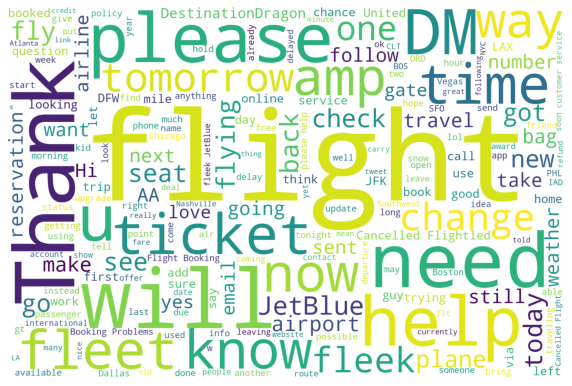

In [113]:
createWordCloud('neutral')

In [116]:
tweets.text_clean

0                                            dhepburn said
1                  plus added commercials experience tacky
2               not today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving 20 minutes late flight no warnings com...
14637          please bring american airlines blackberry10
14638    money change flight not answer phones suggesti...
14639    8 ppl need 2 know many seats next flight plz p...
Name: text_clean, Length: 14604, dtype: object

In [117]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [118]:
def process_message(tweets):
    # remove all the special characters
    new_tweet = re.sub("[^a-zA-Z]", " ",tweets) 
    # convert all letters to lower case
    words = new_tweet.lower().split()
    # remove stop words
    words = [w for w in words if not w in stopwords]        
    # stemming
    #words = [stemmer.stem(word) for word in words]
    # lemmatizer
    #words = [lemmatizer.lemmatize(word) for word in words]
    # join all words back to text
    return (" ".join(words))

In [119]:
tweets['clean_tweet']=tweets['text_clean'].apply(lambda x: process_message(x))
tweets = tweets.drop(labels='text_clean', axis=1)
tweets.head()

tweet_id negativereason         airline airline_sentiment  \
0  570306133677760513            NaN  Virgin America          positive   
1  570301130888122368            NaN  Virgin America          positive   
2  570301083672813571            NaN  Virgin America          positive   
3  570301031407624196     Bad Flight  Virgin America          negative   
4  570300817074462722     Can't Tell  Virgin America          negative   

               tweet_created  text_len  \
0  2015-02-24 11:35:52 -0800        35   
1  2015-02-24 11:15:59 -0800        72   
2  2015-02-24 11:15:48 -0800        71   
3  2015-02-24 11:15:36 -0800       126   
4  2015-02-24 11:14:45 -0800        55   

                                         clean_tweet  
0                                      dhepburn said  
1            plus added commercials experience tacky  
2             today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing

In [123]:
from collections import Counter
from nltk.probability import FreqDist

words = tweets[tweets.airline_sentiment=='positive'].clean_tweet.apply(lambda x : [word.lower() for word in x.split() ])
positive_words = Counter()

for msg in words:
    positive_words.update(msg)
    
print(positive_words.most_common(50))

[('flight', 996), ('thanks', 763), ('co', 757), ('http', 716), ('thank', 523), ('get', 352), ('would', 258), ('help', 255), ('great', 254), ('please', 242), ('flights', 229), ('service', 217), ('us', 203), ('time', 195), ('love', 194), ('need', 181), ('amp', 180), ('dm', 169), ('got', 168), ('today', 160), ('know', 156), ('guys', 154), ('fly', 152), ('good', 152), ('back', 151), ('flying', 147), ('customer', 144), ('way', 142), ('like', 138), ('cancelled', 138), ('much', 134), ('tomorrow', 134), ('new', 133), ('see', 131), ('one', 130), ('best', 128), ('fleek', 121), ('fleet', 119), ('airport', 111), ('go', 110), ('gate', 108), ('airline', 106), ('change', 105), ('plane', 105), ('united', 105), ('first', 104), ('awesome', 104), ('make', 103), ('home', 102), ('follow', 100)]


In [124]:
words = tweets[tweets.airline_sentiment=='negative'].clean_tweet.apply(lambda x : [word.lower() for word in x.split() ])
negative_words = Counter()

for msg in words:
    negative_words.update(msg)
    
print(negative_words.most_common(50))

[('flight', 2953), ('get', 990), ('cancelled', 921), ('service', 747), ('hours', 656), ('help', 618), ('hold', 611), ('customer', 611), ('time', 597), ('plane', 530), ('would', 505), ('delayed', 505), ('amp', 503), ('us', 502), ('still', 492), ('call', 461), ('hour', 457), ('co', 454), ('flightled', 445), ('one', 441), ('http', 436), ('flights', 419), ('bag', 415), ('gate', 410), ('late', 377), ('back', 374), ('need', 374), ('phone', 368), ('waiting', 341), ('please', 326), ('thanks', 315), ('hrs', 300), ('got', 298), ('united', 297), ('airline', 294), ('like', 291), ('trying', 288), ('never', 283), ('delay', 273), ('wait', 272), ('minutes', 270), ('today', 269), ('u', 265), ('day', 259), ('going', 251), ('airport', 251), ('could', 250), ('told', 245), ('luggage', 245), ('bags', 245)]


In [128]:
tweets['airline_sentiment'] = tweets['airline_sentiment'].str.replace("negative", "0")
tweets['airline_sentiment'] = tweets['airline_sentiment'].str.replace("positive", "1")
tweets.head()

tweet_id negativereason         airline airline_sentiment  \
0  570306133677760513            NaN  Virgin America                 1   
1  570301130888122368            NaN  Virgin America                 1   
2  570301083672813571            NaN  Virgin America                 1   
3  570301031407624196     Bad Flight  Virgin America                 0   
4  570300817074462722     Can't Tell  Virgin America                 0   

               tweet_created  text_len  \
0  2015-02-24 11:35:52 -0800        35   
1  2015-02-24 11:15:59 -0800        72   
2  2015-02-24 11:15:48 -0800        71   
3  2015-02-24 11:15:36 -0800       126   
4  2015-02-24 11:14:45 -0800        55   

                                         clean_tweet  
0                                      dhepburn said  
1            plus added commercials experience tacky  
2             today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing

# Vectorization
- With the list of tokens (also known as lemmas), we will then convert each message into a vector with the help with sci-kit learns algorithm so that our ML models can understand
To do that, we will use the 3 step Bag-of-Words approach:

1. Count the number of times a word occurs in each message -- also known as the term frequency
2. Weigh the counts using TF-IDF
3. Normalise the vectors to unit length to reduce its randomness, bringing it closer to a predefined “standard”.

In [129]:
X = tweets.clean_tweet
y = tweets.airline_sentiment

print(X.shape)
print(y.shape)

(14604,)
(14604,)


## CountVectorizer

<b> CountVectorizer is useful here as many arugments and parameters can be passed to the CountVectorizer. </b>

In [130]:
# split X and y into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10222,)
(4382,)
(10222,)
(4382,)


In [148]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate CountVectorizer

vect = CountVectorizer(ngram_range=(1, 2), max_df=0.3)
vect.fit(X_train)

CountVectorizer(max_df=0.3, ngram_range=(1, 2))

In [151]:
# learn training data vocabulary, then use it to create a document term matrix

X_train_dtm = vect.transform(X_train)

In [152]:
X_train_dtm

<10222x72108 sparse matrix of type '<class 'numpy.int64'>'
	with 172652 stored elements in Compressed Sparse Row format>

In [153]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<4382x72108 sparse matrix of type '<class 'numpy.int64'>'
	with 48039 stored elements in Compressed Sparse Row format>

In [154]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<10222x72108 sparse matrix of type '<class 'numpy.float64'>'
	with 172652 stored elements in Compressed Sparse Row format>

# Building and evaluating a model

- We will use 7 different models for classification of positive and negative tweets.

In [162]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [168]:
# Import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [173]:
nb = MultinomialNB()

score = []

nb.fit(X_train_dtm, y_train)
y_pred = nb.predict(X_test_dtm)
NB = accuracy_score(y_test, y_pred)
score.append(NB)

Text(0.5, 10.5, 'Predicted label')

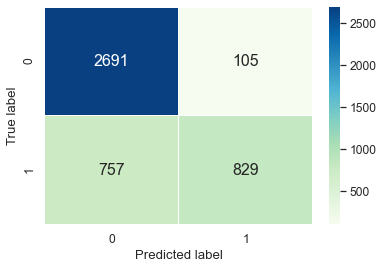

In [170]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, cmap="GnBu", annot_kws={"size": 16}) # font size
plt.ylabel("True label")
plt.xlabel("Predicted label")

In [174]:
svm = SVC()

svm.fit(X_train_dtm, y_train)
y_pred = svm.predict(X_test_dtm)
SVM = accuracy_score(y_test, y_pred)

score.append(SVM)

In [175]:
logreg = LogisticRegression()

logreg.fit(X_train_dtm, y_train)
y_pred = logreg.predict(X_test_dtm)
LogReg = accuracy_score(y_test, y_pred)
score.append(LogReg)

In [176]:
dt = DecisionTreeClassifier()

dt.fit(X_train_dtm, y_train)
y_pred = dt.predict(X_test_dtm)
DT = accuracy_score(y_test, y_pred)
score.append(DT)

In [177]:
knn = KNeighborsClassifier()

knn.fit(X_train_dtm, y_train)
y_pred = knn.predict(X_test_dtm)
KNN = accuracy_score(y_test, y_pred)
score.append(KNN)

In [178]:
rf = RandomForestClassifier()

rf.fit(X_train_dtm, y_train)
y_pred = rf.predict(X_test_dtm)
RF = accuracy_score(y_test, y_pred)
score.append(RF)


In [180]:
gb = GradientBoostingClassifier()

gb.fit(X_train_dtm, y_train)
y_pred = gb.predict(X_test_dtm)
GB = accuracy_score(y_test, y_pred)
score.append(GB)

In [186]:
# Run the following code as is.
models = []
models.append("MultinomialNB")
models.append("SVM")
models.append("LogisticRegression")
models.append("DecisionTree")
models.append("KNN")
models.append("RandomForest")
models.append("GradientBoost")

models

['MultinomialNB',
 'SVM',
 'LogisticRegression',
 'DecisionTree',
 'KNN',
 'RandomForest',
 'GradientBoost']

In [188]:
score = [round(x, 2) for x in score]
score

[0.8, 0.81, 0.83, 0.76, 0.51, 0.8, 0.76]

In [193]:
model_accuracy = pd.DataFrame({'classifier': models, 
                               'accuracy' : score}, index=None)
model_accuracy = model_accuracy.sort_values(by='accuracy', ascending=False)
model_accuracy.set_index('classifier', inplace=True)
model_accuracy

accuracy
classifier                  
LogisticRegression      0.83
SVM                     0.81
MultinomialNB           0.80
RandomForest            0.80
DecisionTree            0.76
GradientBoost           0.76
KNN                     0.51

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'SVM'),
  Text(2, 0, 'MultinomialNB'),
  Text(3, 0, 'RandomForest'),
  Text(4, 0, 'DecisionTree'),
  Text(5, 0, 'GradientBoost'),
  Text(6, 0, 'KNN')])

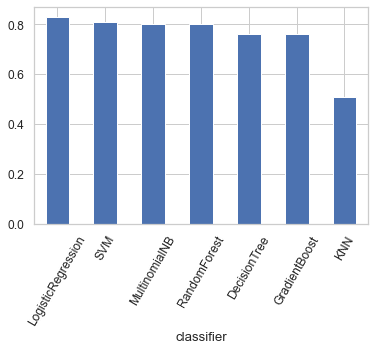

In [195]:
model_accuracy['accuracy'].plot(kind='bar')
plt.xticks(rotation=60)